**Section I: Import the Data**

Imports and Read in File

In [81]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cross_validation, preprocessing
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot') 

In [82]:
adult = pd.read_csv("../../assets/datasets/adult.csv")

**Section II: Format the Data**

Convert the data to a Pandas dataframe to work with the data:

In [83]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small


In [84]:
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [85]:
adult.dropna(axis = 0, inplace = True)

In [86]:
adult = pd.DataFrame(adult)
adult = adult.reset_index(drop = True)

In [87]:
adult.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education-num',
       u'marital-status', u'occupation', u'relationship', u'race', u'sex',
       u'capital-gain', u'capital-loss', u'hours-per-week', u'native-country',
       u'income'],
      dtype='object')

In [88]:
adult['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [90]:
adult['workclass'] = pd.Series(adult['workclass'], dtype='category')

adult['workclass'] = adult['workclass'].cat.rename_categories([1,2,3,4,5,6,7])
adult['workclass'].value_counts()

3    22286
5     2499
2     2067
6     1279
4     1074
1      943
7       14
dtype: int64

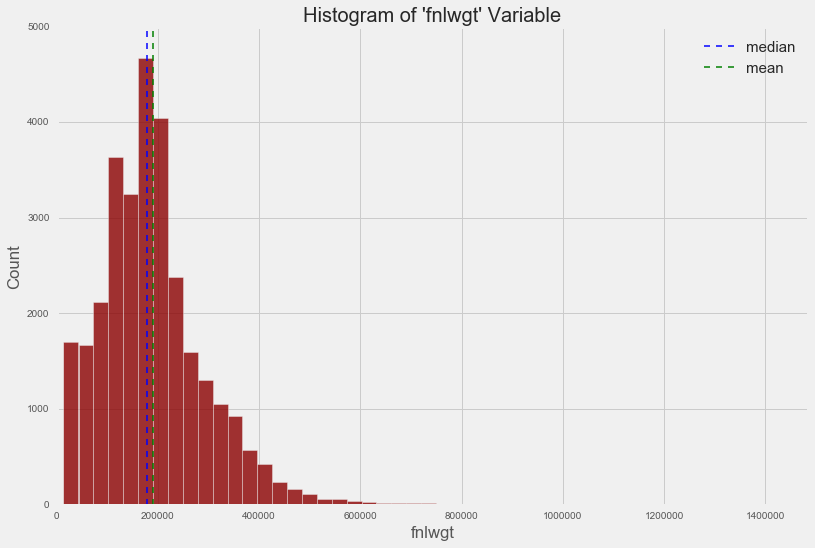

In [92]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

age_hist = plt.hist(adult['fnlwgt'], color = 'darkred', alpha = 0.8, bins = 50)
plt.axvline(adult['fnlwgt'].median(), color='b', linestyle='dashed', linewidth=1.5, label = 'median')
plt.axvline(adult['fnlwgt'].mean(), color='g', linestyle='dashed', linewidth=1.5, label = 'mean')

plt.title('Histogram of \'fnlwgt\' Variable', fontsize = 20)

# y label
plt.ylabel('Count')

# x label
plt.xlabel('fnlwgt')

plt.xlim([0, max(adult['fnlwgt'])])
#plt.ylim([0, 110])

plt.legend(loc='upper right', fontsize = 15)

plt.show()

In [93]:
adult['education-num'].value_counts()

9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: education-num, dtype: int64

In [94]:
adult['marital-status'].value_counts()

Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital-status, dtype: int64

In [95]:
adult['marital-status'] = pd.Series(adult['marital-status'], dtype='category')

adult['marital-status'] = adult['marital-status'].cat.rename_categories([1,2,3,4,5,6,7])
adult['marital-status'].value_counts()

3    14065
5     9726
1     4214
6      939
7      827
4      370
2       21
dtype: int64

In [96]:
adult['occupation'].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [97]:
adult['occupation'] = pd.Series(adult['occupation'], dtype='category')

adult['occupation'] = adult['occupation'].cat.rename_categories([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
adult['occupation'].value_counts()

10    4038
3     4030
4     3992
1     3721
12    3584
8     3212
7     1966
14    1572
6     1350
5      989
13     912
11     644
9      143
2        9
dtype: int64

In [98]:
adult['relationship'].value_counts()

Husband           12463
Not-in-family      7726
Own-child          4466
Unmarried          3212
Wife               1406
Other-relative      889
Name: relationship, dtype: int64

In [99]:
adult['relationship'] = adult['relationship'].apply(lambda x: x.replace('Husband', 'spouse'))
adult['relationship'] = adult['relationship'].apply(lambda x: x.replace('Wife', 'spouse'))
adult['relationship'].value_counts()

spouse            13869
Not-in-family      7726
Own-child          4466
Unmarried          3212
Other-relative      889
Name: relationship, dtype: int64

In [100]:
adult['relationship'] = pd.Series(adult['relationship'], dtype='category')

adult['relationship'] = adult['relationship'].cat.rename_categories([1,2,3,4,5])
adult['relationship'].value_counts()

5    13869
1     7726
3     4466
4     3212
2      889
dtype: int64

In [101]:
adult['race'].value_counts()

White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64

In [102]:
adult['race'] = pd.Series(adult['race'], dtype='category')

adult['race'] = adult['race'].cat.rename_categories([1,2,3,4,5])
adult['race'].value_counts()

5    25933
3     2817
2      895
1      286
4      231
dtype: int64

In [103]:
adult['sex'].value_counts()

Male      20380
Female     9782
Name: sex, dtype: int64

In [104]:
adult['sex'] = pd.Series(adult['sex'], dtype='category')

adult['sex'] = adult['sex'].cat.rename_categories([1,2])
adult['sex'].value_counts()

2    20380
1     9782
dtype: int64

In [105]:
#adult['native-country'].value_counts()

In [106]:
adult['income'].value_counts()

small    22654
large     7508
Name: income, dtype: int64

In [107]:
adult['income'] = pd.Series(adult['income'], dtype='category')

adult['income'] = adult['income'].cat.rename_categories([1,2])
adult['income'].value_counts()

2    22654
1     7508
dtype: int64

In [108]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,Bachelors,13,5,1,1,5,2,2174,0,40,United-States,2
1,50,5,83311,Bachelors,13,3,4,5,5,2,0,0,13,United-States,2
2,38,3,215646,HS-grad,9,1,6,1,5,2,0,0,40,United-States,2
3,53,3,234721,11th,7,3,6,5,3,2,0,0,40,United-States,2
4,28,3,338409,Bachelors,13,3,10,5,3,1,0,0,40,Cuba,2


In [127]:
X_prescale = adult[['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status', 'occupation', \
                          'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']]

X_scaled = preprocessing.scale(X_prescale)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status', 'occupation', \
                          'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
X_scaled.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,0.042796,2.936000,-1.062722,1.128918,0.947847,-1.479055,-1.493987,0.385048,0.692806,0.146092,-0.218586,-0.077734,0.575691
1,0.880288,1.887682,-1.007871,1.128918,-0.387275,-0.734545,0.911449,0.385048,0.692806,-0.147445,-0.218586,-2.331531,0.575691
2,-0.033340,-0.208955,0.244693,-0.439738,-1.722396,-0.238206,-1.493987,0.385048,0.692806,-0.147445,-0.218586,-0.077734,0.575691
3,1.108695,-0.208955,0.425240,-1.224066,-0.387275,-0.238206,0.911449,-2.011035,0.692806,-0.147445,-0.218586,-0.077734,0.575691
4,-0.794697,-0.208955,1.406658,1.128918,-0.387275,0.754473,0.911449,-2.011035,-1.443405,-0.147445,-0.218586,-0.077734,0.575691


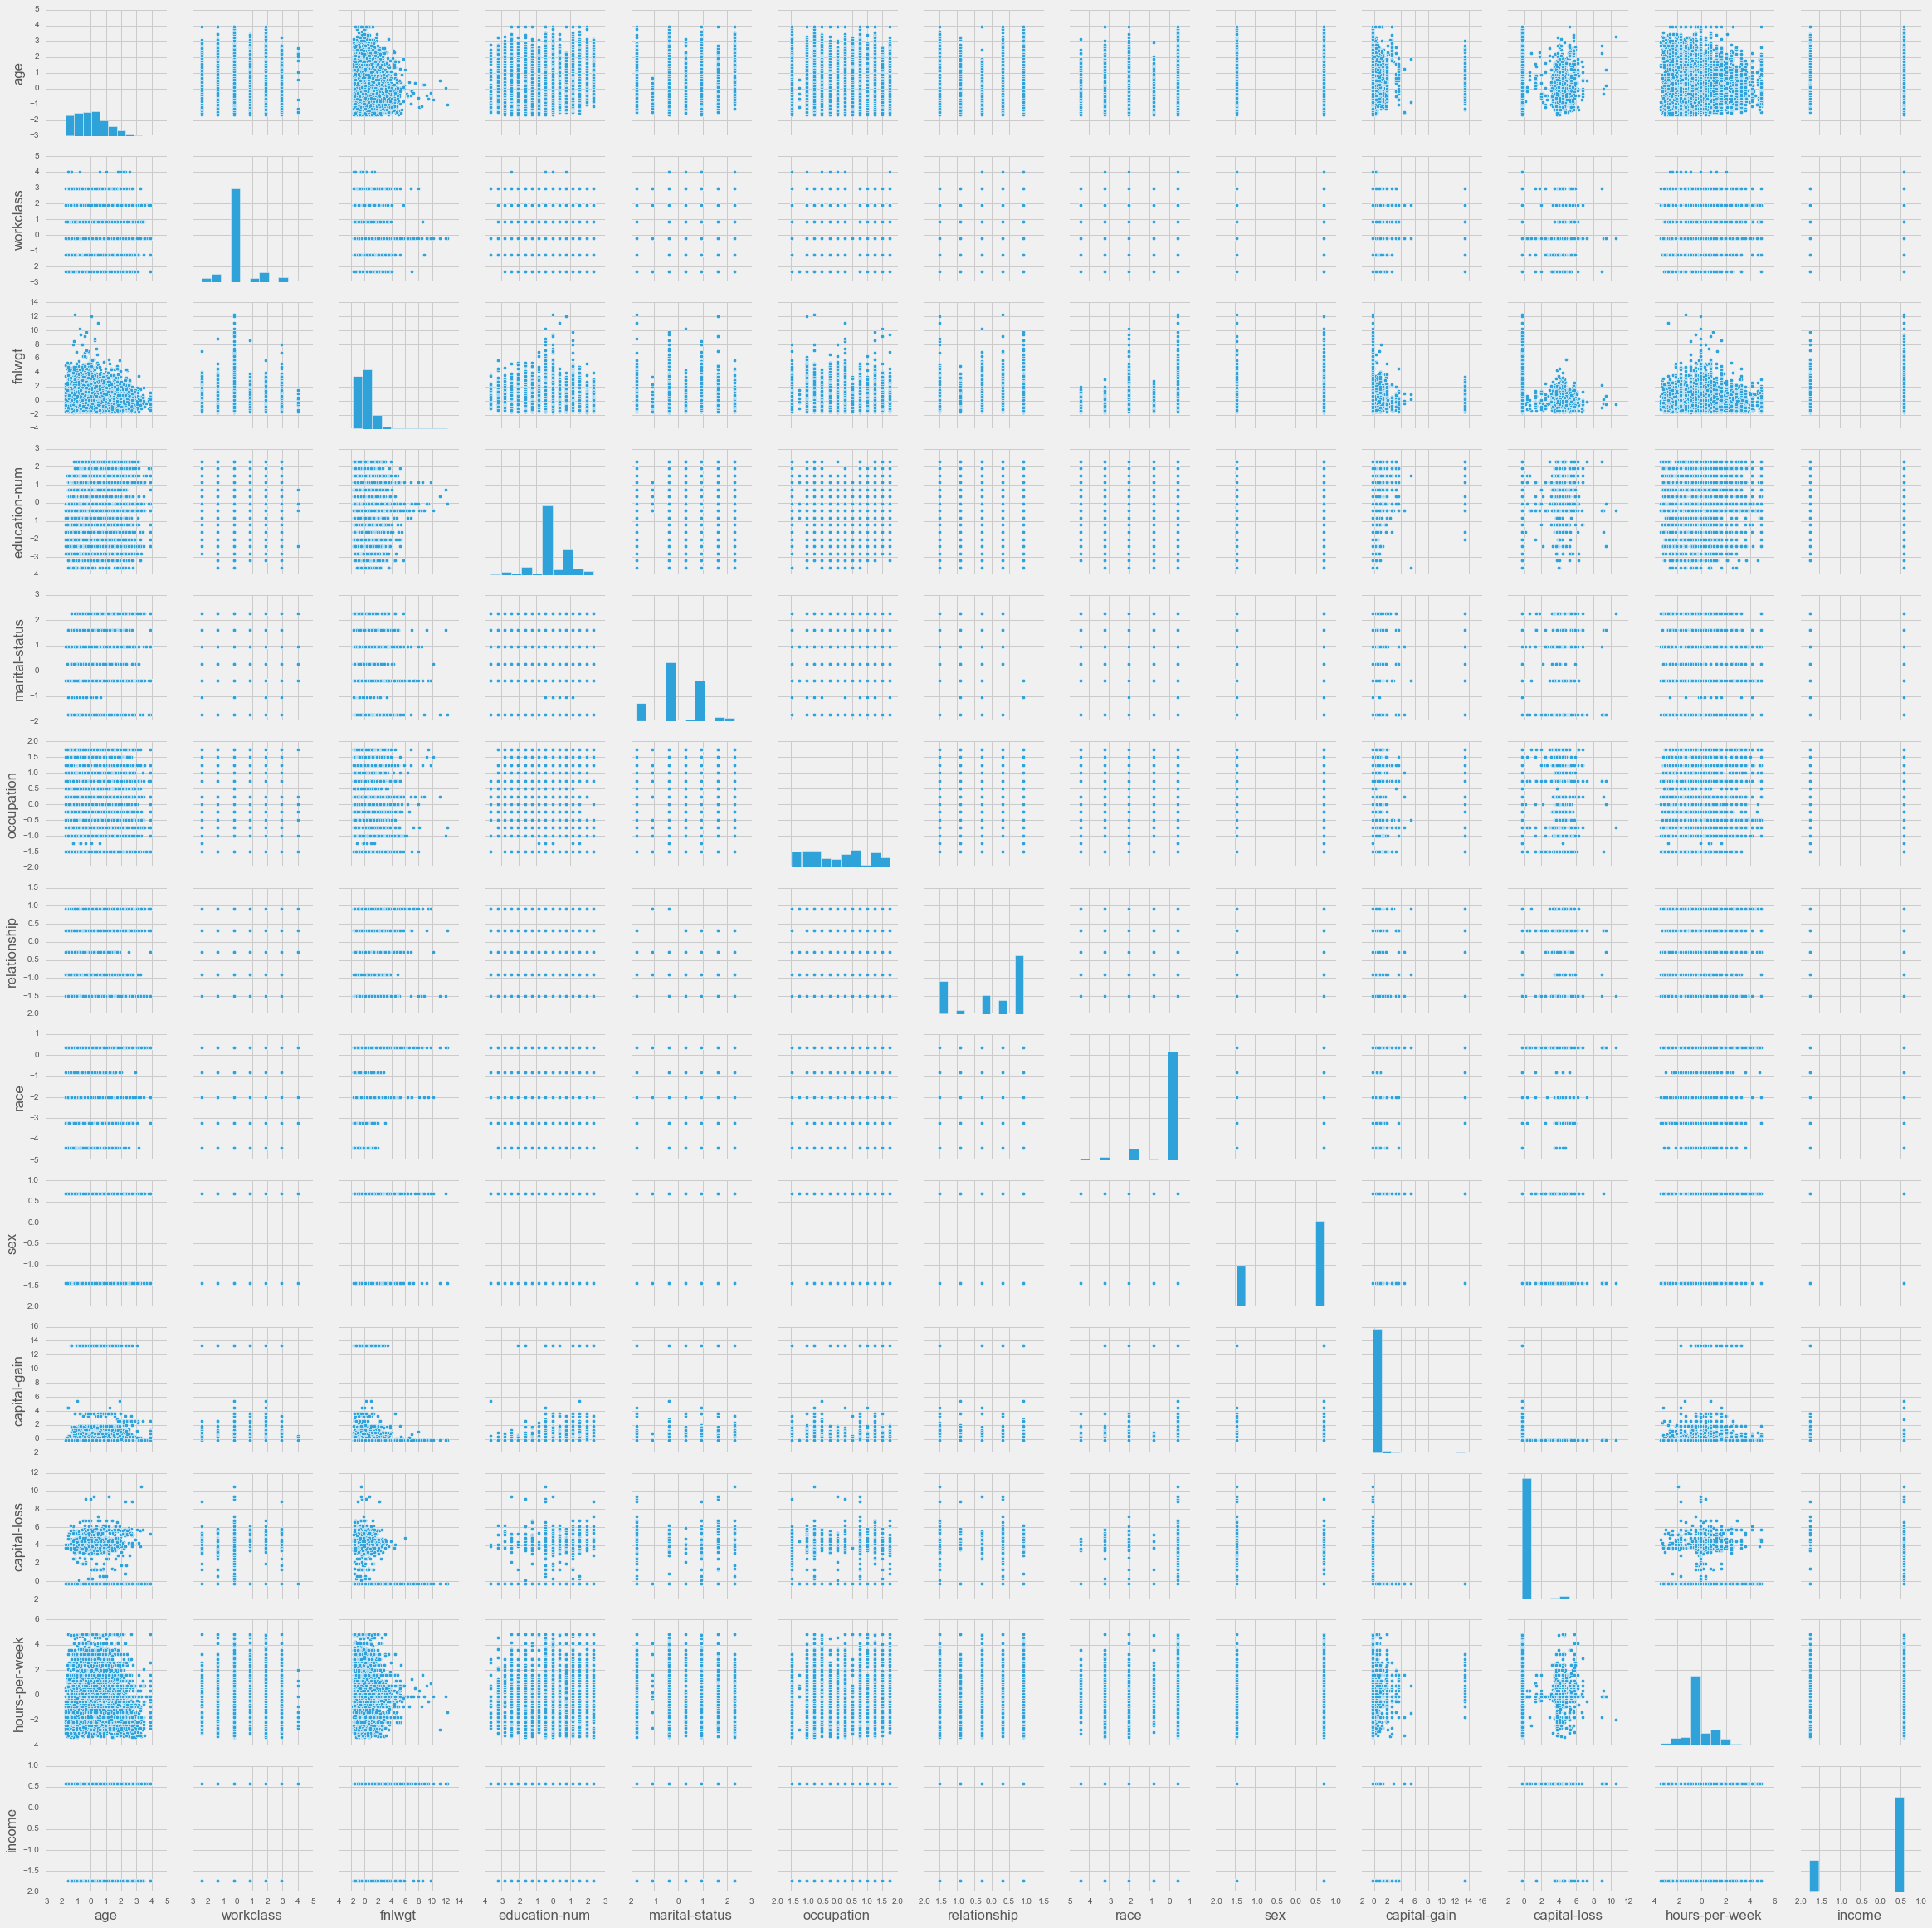

In [111]:
sns.pairplot(X_scaled)

In [128]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [129]:
labels = kmeans.labels_
clusters = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

In [130]:
labels

array([1, 0, 0, ..., 1, 1, 0], dtype=int32)

In [131]:
centroids

array([[-0.53320934, -0.10012391,  0.06319236, -0.13133421,  0.91335688,
        -0.0089693 , -0.78973954, -0.14802563, -0.42360753, -0.1142746 ,
        -0.10292407, -0.35223885,  0.4937983 ],
       [ 0.37357122,  0.0701477 , -0.04427313,  0.09201392, -0.63990599,
         0.00628397,  0.55329858,  0.10370808,  0.29678322,  0.08006181,
         0.07210952,  0.24678169, -0.3459595 ]])

In [ ]:
s = []
for k in [2, 10]:
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    s_i = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
    s.append(s_i)

Convert the categorical Data to numeric for our analysis. **HINT:** Refer to lesson 1.1 for writing a function of this sort

Apply the functions you just wrote and append the results to the dataframe

**Section III: Examine the Data**

Plot the Data to see the distributions our our target markets; plot multiple indicators to see the relationships *IE: Education and Income*

After plotting, decide on how many clusters you want to start with. 

**Section IV: Prepare for Clustering**

Create a New Dataframe with just numerical data for the analysis

Check for NaN and Infinite Numbers - Our data is messy!

In [ ]:
np.any(np.isnan(...))

Clean and scale your features

**Section V: Clustering Analysis**

Cluster the Data to our our target groups. **BONUS**: Perform multiple clustering tests on various indicator variables

Get the labels and centroids

In [ ]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Compute the Silhoutte Score, AMI and inertia to measure your analysis

Calculate the precision, recall and F1 score

Plot your confusion matrix

Segment your dataframe by the new cluster labels. Create scatterplots that show your clusters in different colors 

### Section VI: Interpreting your clusters
Look at your scatterplots. See how each of the clusters breakdown. Come up with descriptions for each of the clusters you've created based on the relevant census variables.